In [1]:
import os
os.chdir('../src')

In [2]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

## Regression

Theoretically optimizing the log-return accuracy should be equivalent to optimizing the expected log-returns and thus equivalent to optimizing the returns. Thus, returns-wise it might be a better idea to use regression.

In [1]:
keys = ['timestamp','open','high','low','close','volume','TakerBuyQuoteAssetVolume',
                           'TakerBuyBaseAssetVolume','QuoteAssetVolume','trades']
df = pd.read_csv("../data/cryptoarchive/ETHBTC_1m.csv", sep='|', header=None,
                    names=keys)
df['target'] = pd.Series(np.log(df.close)).diff(1).shift(-1)
df['preds'] = pd.read_hdf('../data/predictions/timescaling.h5', key='predictions')
df = df.dropna()

importances = pd.read_hdf('../data/predictions/timescaling.h5', key='importances')
print('trivial baseline:', (df.target > 0).sum() / len(df) )

NameError: name 'pd' is not defined

In [20]:
metrics.confusion_matrix(df.target > 0, df.preds > 0)

array([[42754, 42501],
       [33882, 34323]])

In [29]:
for t in [0, 0.1, 0.2, 0.3, 0.5, 1]:
    print('threashold {}, accuracy {}, invested rate {}'.format(t, metrics.accuracy_score(df.target > 0, df.preds > t),
                                                               (df.preds > t).sum() / len(df)))

threashold 0, accuracy 0.5022611755506321, invested rate 0.5006125374690473
threashold 0.1, accuracy 0.5126091489638994, invested rate 0.3881923628307051
threashold 0.2, accuracy 0.5242603935879057, invested rate 0.27674964160041704
threashold 0.3, accuracy 0.5354163951518311, invested rate 0.16952951909292324
threashold 0.5, accuracy 0.5513554020591686, invested rate 0.0357878274468917
threashold 1, accuracy 0.5554932881532647, invested rate 0.00041053043138277075


In [6]:
df.preds.std()

0.2974059386724999

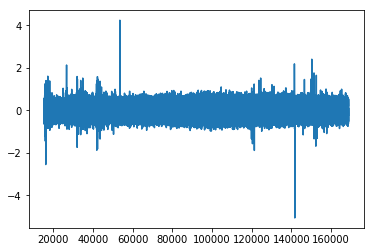

In [21]:
df.preds.plot()

In [7]:
s = (df.rolling(100).std().dropna() == 0).sum()
s[s != 0]

TakerBuyQuoteAssetVolume    174
TakerBuyBaseAssetVolume     174
dtype: int64

In [8]:
importances.sort_values()

STOCH_k                -0.163338
ROCR_0                 -0.149414
WILLR_0                -0.139971
RSI_0                  -0.139116
ADOSC_0                -0.092378
ULTOSC_0               -0.077533
APO_0                  -0.032927
MINUS_DM_0             -0.029395
BOP                    -0.018517
HT_SINE_sine           -0.014177
ADX_0                  -0.009212
AROON_up               -0.008931
MINUS_DI_0             -0.008642
MFI_0                  -0.005816
BBANDS_up_0std         -0.003687
HT_PHASOR_quadrature   -0.003102
HT_PHASOR_inphase      -0.002818
STOCHRSI_k_0           -0.000013
AROON_down              0.001198
PLUS_DM_0               0.001822
HT_DCPERIOD             0.002910
EMA/                    0.003234
HT_DCPHASE              0.005542
HT_TRENDMODE            0.005598
DX_0                    0.007331
HT_SINE_leadsine        0.007576
BBWIDTH_0std            0.010753
NATR_0                  0.013324
MOM_0                   0.019340
SAR_Signal              0.027682
CMO_0     

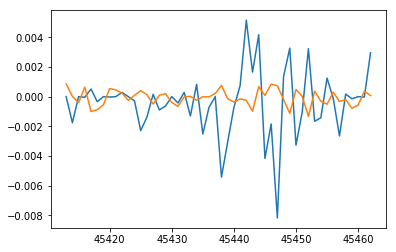

In [12]:
df.target[30000:30050].plot()
(df.preds * df.target.rolling(25).std())[30000:30050].plot()

Nice predictor we got here. At least it's not overfitting. The little accuracy performance we got was due to me dividing by the rolling standard deviation.

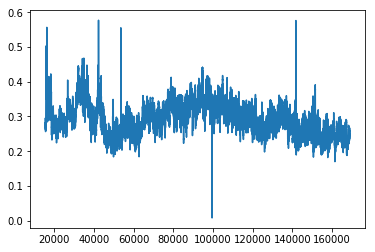

In [22]:
df.preds.rolling(100).std().plot()